In [1]:
import json

In [2]:
with open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/FianlCompanyInfo3.json', 'r') as f:
    CompanyInfos = json.load(f)

In [12]:
from wordcloud import WordCloud
from collections import Counter
from wordcloud import ImageColorGenerator

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

import re

In [5]:
Company_words1 = dict()
for key, value in CompanyInfos.items():
    Company_words1[key] = []
    for word in value['preprocess']:
        Company_words1[key] += word.split(" ")

In [6]:
from pykospacing import Spacing

spacing = Spacing()

from konlpy.tag import Mecab
mecab = Mecab()

In [10]:
stopwords = set()
addWords = set()

f = open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/stopwords_final.txt')
while True:
    line = f.readline()
    if not line:break
    stopwords.add(line[:-1])
f.close()

f = open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/addwords_final.txt')
while True:
    line = f.readline()
    if not line:break
    addWords.add(line[:-1])
f.close()

In [22]:
def clean_content(sentences, stopwords):
    sentences_words = []

    for sentence in sentences:
        # 정규 표현식 필터 1 - 기호 제거(한글, 숫자, 영어 => )
        sentence = spacing(sentence) 
        sentence = re.sub('[^a-f가-힣 ]', "", sentence.lower())

        new_words = []
        for word, pos in mecab.pos(sentence):
            if "NNG" in pos or "NNP" in pos or "VA" in pos:
                if word not in stopwords:
                    sentences_words.append(word.strip())

    return sentences_words

In [20]:
text = [
    "저는 대학교 1학년 때, 아울렛에 있는 한 의류매장에서 알바를 하게 되었습니다. ",
    "평소 사람들을 대하는 데에 관심이 많기도 했고, 옷을 좋아하던 터라 여러 종류의 옷을 판매한다는 점에 흥미를 느껴 시작하게 되었습니다. ",
    "제가 일하는 매장은 스파 브랜드여서 남녀노소 다양한 연령층이 방문하셨습니다. ",
    "그중, 유행에 민감한 제 또래의 학생들은 부츠컷 바지 등 그해 트렌드를 반영한 스타일들을 선호하셨고, 직장인들은 출근할 때 무난하게 입을 수 있는 셔츠나 슬랙스 등을 자주 사 가셨으며, 중. 장년층들의 고객들은 몸에 붙지 않고 편하게 입을 수 있으며, 체형 커버도 되는 스타일의 옷을 선호하셨습니다. ",
    "또, 여성 고객들은 대체로 직접 옷을 입어보고 자신에게 어울리는 스타일들을 알아서 사 가시는 반면, 남성 고객들은 옷을 사러 왔을 때 어색해하며 자신에게 어울리는 옷을 추천해달라고 하는 분들이 많았습니다.",
    "이를 통해 각 연령층에 따라, 성별에 따라 다르게 접근을 해야 고객의 니즈(Needs)를 파악하고, 구매로 이루어질 수 있게 한다는 것을 느꼈습니다.",
    "대학교 3학년쯤, 교수님들은 입을 맞춘 것처럼 들어오는 수업마다 취업에 대한 얘기를 꺼내셨습니다. ",
    "하지만, 저는 이 시기에 하고 싶은 것도 모르겠고, 다른 사람들에 비해 뚜렷하게 잘하는 것도 없다고 느껴 막막한 생각만 들었습니다. ",
    "그러나, “의료관광 마케팅론” 수업을 듣고 난 후, 이는 저에게 큰 전환점으로 다가왔습니다.",
    "이 수업에서는 의료 서비스와 관광 서비스를 합쳐 외국인 고객들을 유치하는 ‘의료관광 서비스’에 대해 배웠는데, 이에도 국가별 고객들에 따른 나름의 전략이 필요하였습니다. ",
    "가장 중점적으로 다룬 개념은 “SWOT” 기법으로, 이 마케팅전략은 Strength(강점), Weakness(약점), Opportunity(기회), Threat(위협)을 분석하는 것으로, 의료 서비스뿐만 아니라 다양한 분야에서 활용되고 있습니다.",
    "이를 통해, 평소 당연하게만 느꼈던 동네 슈퍼에서 물건의 배치, 간판 등 작은 것에서도 마케팅이 이용되고 있다는 것을 알 수 있었습니다.",
    "이에 흥미를 느껴 마케팅 관련 직종에서 일하겠다고 다짐하게 되었습니다."
]

In [25]:
from krwordrank.word import KRWordRank
from krwordrank.sentence import summarize_with_sentences
from krwordrank.word import summarize_with_keywords

In [26]:
result = clean_content(text, stopwords)

In [33]:
result

['의류',
 '매장',
 '사람',
 '판매',
 '흥미',
 '매장',
 '스파',
 '브랜드',
 '다양',
 '연령층',
 '방문',
 '유행',
 '또래',
 '부츠',
 '컷',
 '트렌드',
 '스타일',
 '선호',
 '직장인',
 '출근',
 '셔츠',
 '슬랙스',
 '장년층',
 '고객',
 '체형',
 '커버',
 '스타일',
 '선호',
 '고객',
 '스타일',
 '고객',
 '추천',
 '연령층',
 '고객',
 '니즈',
 '파악',
 '구매',
 '교수',
 '수업',
 '취업',
 '사람',
 '생각',
 '의료관광',
 '마케팅',
 '수업',
 '전환점',
 '수업',
 '의료',
 '서비스',
 '관광',
 '서비스',
 '외국인',
 '고객',
 '의료관광',
 '서비스',
 '국가',
 '고객',
 '전략',
 '중점',
 '기법',
 '마케팅',
 '전략',
 '강점',
 '약점',
 '기회',
 '위협',
 '분석',
 '의료',
 '서비스',
 '분야',
 '슈퍼',
 '물건',
 '배치',
 '간판',
 '마케팅',
 '흥미',
 '마케팅',
 '직종',
 '다짐']

In [28]:
wordrank_extractor = KRWordRank(
    min_count = 1, 
    max_length = len(result), # 단어의 최대 길이
    verbose = True
)

In [31]:
keywords1, rank, graph = wordrank_extractor.extract(result, 10)

scan vocabs ... 
num vocabs = 172
done = 10


In [32]:
keywords1

{'서비': 7272727279.000002,
 '전환': 6818181818.5,
 '연령': 6060606064.333332,
 '의료관': 6060606064.333332,
 '브랜': 4545454546.0,
 '트렌': 4545454546.0,
 '직장': 4545454546.0,
 '외국': 4545454546.0,
 '장년': 3030303027.666666,
 '슬랙': 1818181813.0000005,
 '스타': 1.0,
 '마케': 1.0}

In [34]:
total_min = 100000000000

for key, value in CompanyInfos.items():
    total_min = min(total_min, len(value['keywords1']))

In [35]:
total_min

33

In [42]:
from collections import Counter
Company_words1 = dict()

for key, value in CompanyInfos.items():
    Company_words1[key] = []
    for word in value['preprocess']:
        Company_words1[key] += word.split(" ")
    Company_words1[key] = Counter(Company_words1[key])

In [44]:
Company_words2 = dict()
for key, value in CompanyInfos.items():
    temp = []
    for word, r in sorted(value['keywords1'].items(), key=lambda x:x[1], reverse=True)[:10]:
        temp.append([word, r])
    
    score = sum([temp[idx][1] for idx in range(len(temp))])
    for idx in range(len(temp)):
        a = (temp[idx][1]/score)*100
        temp[idx][1] = (round(a,2))
    Company_words2[key] = temp
        

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import squarify


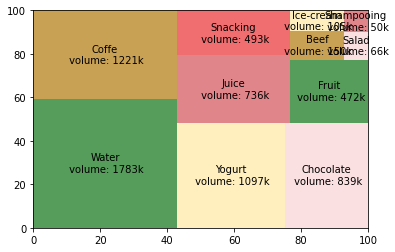

In [39]:
for key, value in Company_words2.items():
    keywords = value
    frequency = Company_words1['']
    
    colors = sns.color_palette('PuBu',len(kword_30)) 
    plt.rcParams["font.family"] = 'AppleGothic'
    plt.rcParams['figure.figsize'] = (9, 9)
    plt.rcParams['font.size'] = 10
    b = round(df_1['점수'],2)
    squarify.plot(sizes=df_1['점수'], label=df_1['기업'], value=b,color=colors)